
#  Training Complex CNN architectures.

We will build and train a convolutional network on CIFAR-10 dataset. We will use popular Lenet architecture.



Load all the necessary packages

In [1]:
import numpy as np
import os
#os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu,floatX=float32"
#import theano
import keras

from keras.datasets import cifar10
from keras.models  import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: ignored

## Train on CIFAR-10 dataset

#### Load CIFAR 10 dataset.

CIFAR-10 is the widely used dataset in deep learning community to benchmark, validate and evaluate any new findings.
CIFAR-10 dataset contains around 60k images belonging to 10 classes. It contains 50k training and 10k test images. The dataset is available at http://www.cs.toronto.edu/~kriz/cifar.html . Please visit the webpage to know more about the dataset.




In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Training data:")
print( "Number of examples: ", X_train.shape[0])
print( "Number of channels:",X_train.shape[3] )
print( "Image size:", X_train.shape[1], X_train.shape[2])
print("\n")
print( "Test data:")
print( "Number of examples:", X_test.shape[0])
print( "Number of channels:", X_test.shape[3])
print( "Image size:",X_test.shape[1], X_test.shape[2]) 

170500096/170498071 [==============================] - 12s 0us/step
Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32


Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32


#### Visualize some images from CIFAR-10 dataset. 
It contains 10 classes namely, airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

(288, 320, 3) 255 0


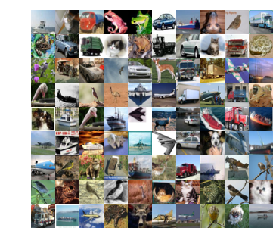

In [4]:
plot = []
for i in range(1,10):
    plot_image = X_train[100*i,:,:,:]
    for j in range(1,10):
        plot_image = np.concatenate((plot_image, X_train[100*i+j,:,:,:]), axis=1)
    if i==1:
        plot = plot_image
    else:
        plot = np.append(plot, plot_image, axis=0)
print(plot.shape, np.max(plot), np.min(plot))
plt.imshow(plot/255)
plt.axis('off')
plt.show()

#### Normalize the data.

In [5]:
print("mean before normalization:", np.mean(X_train)) 
print("std before normalization:", np.std(X_train))

mean=[0,0,0]
std=[0,0,0]
newX_train = np.ones(X_train.shape)
newX_test = np.ones(X_test.shape)
for i in range(3):
    mean[i] = np.mean(X_train[:,:,:,i])
    std[i] = np.std(X_train[:,:,:,i])
    
for i in range(3):
    newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
        
    
X_train = newX_train
X_test = newX_test

print("mean after normalization:", np.mean(X_train))
print("std after normalization:", np.std(X_train))

mean before normalization: 120.70756512369792
std before normalization: 64.1500758911213
mean after normalization: 4.91799193961621e-17
std after normalization: 0.9999999999999996


#### Specify Training Parameters

In [0]:
batchSize = 50                    #-- Training Batch Size
num_classes = 10                  #-- Number of classes in CIFAR-10 dataset
num_epochs = 10                   #-- Number of epochs for training   
learningRate= 0.001               #-- Learning rate for the network
lr_weight_decay = 0.95            #-- Learning weight decay. Reduce the learn rate by 0.95 after epoch


img_rows, img_cols = 32, 32       #-- input image dimensions

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

#### Lets build a CNN network (LeNet) in Theano Keras and train on CIFAR-10 dataset.

In [23]:
model = Sequential()                                                #-- Sequential container.

model.add(Convolution2D(6, 5, 5,                                    #-- 6 outputs (6 filters), 5x5 convolution kernel
                        border_mode='valid',
                        input_shape=( img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
model.add(Activation('relu'))                                       #-- ReLU non-linearity 
model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
model.add(Convolution2D(16, 5, 5))                                  #-- 16 outputs (16 filters), 5x5 convolution kernel
model.add(Activation('relu'))                                       #-- ReLU non-linearity
model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
model.add(Dense(120))                                               #-- 120 outputs fully connected layer
model.add(Activation('relu'))                                       #-- ReLU non-linearity 
model.add(Dense(84))                                                #-- 84 outputs fully connected layer
model.add(Activation('relu'))                                       #-- ReLU non-linearity 
model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_57 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_58 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 400)               0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(32, 32, 3..., padding="valid")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5))`
  


#### Compile and then train the network

In [24]:
sgd = SGD(lr=learningRate, decay = lr_weight_decay)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#-- switch verbose=0 if you get error "I/O operation from closed file"
history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
          verbose=1, shuffle=True, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 10s 204us/step - loss: 1.8386 - acc: 0.3341 - val_loss: 1.5714 - val_acc: 0.4306
Epoch 2/10
14500/50000 [=======>......................] - ETA: 6s - loss: 1.5567 - acc: 0.4322

KeyboardInterrupt: ignored

#### Print the scores

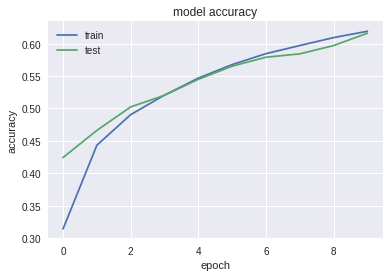

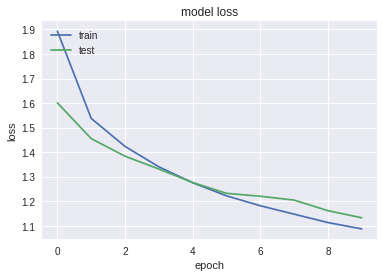

In [9]:
#-- summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#-- summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
#-- test the network
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 1.1322588329315186
Test accuracy: 0.6162


In [0]:
#cifar10_weights = model.get_weights()
#np.savez("cifar10_weights_new", cifar10_weights = cifar10_weights)

*italicized text*#### save the model


** Q1: [0.5 point] **

What are the number of parameters in convolution layers with K filters each of size 3*w*h.
* Ans :  number of weights in 1 filter = ( 3 * w * h ) + 1. 
* Total number of weights = number of filters * number of weights
                              = K * ( 3 * w* h + 1 )
                              = 3 * k * w * h + k 

** Q2: [0.5 points] ** 

What are the number of parameters in a max pooling operation? 
* Ans : 0

**Q3: [0.5 point]**

Which of the operations contain most number of parameters?
      (a) conv (b) pool (c) Fully connected layer (FC) (d) Relu 
* Ans: (c) fully connected layer n^2 * p ( n*n is size of image and p is output layer size)  

**Q4: [0.5 point]**

Which operation consume most amount of memory?
     (a) initial convolution layers (b) fully connected layers at the end
    
* Ans: (d) Fully connected layers at the end

** Q5: [2 points] **

Experiment with **learning rate** (learningRate) and notice the behaviour of the learning process. Plot your observations in a graph with brief explanation.
Take the values on a log scale. Vary only one parameter at a time.


** Q6: [2 points] **

Currently, the **batch-size** is 50. Notice the training loss curve if batch size is changed to 1. Is it smooth or fluctating? Show the effect of batch-size on the learning curves in a plot.
Take the values on a log scale. Vary only one parameter at a time.

** Q7: [2 points] **

Increase the **number of convolution filters** and experiment. Present your observations using plots and brief explanations.
Take the values on a log scale. Vary only one parameter at a time.

** Q8: [2 points] **

What do you observe if you increase the **number of layers** (depth of the network) ? Present your observations using plots and brief explanations. 

** Q9: [2 points] **

What do you observe if you increase the **activation functions** (tanh, relu, sigmoid) ? Present your observations using plots and brief explanations. 

** Q10: [1 points] **

CNN training requires lot of training data. In the absence of large training data, a common practice is to use synthetic data using operations such as flipping, scaling, etc. Can you think of any other two operations techniques that can help to increase the training set? Demonstrate these effects with sufficient explanation.



```
This code is a modified version of the code from Deep-Learning School which took place at IIIT-Hyd in Summers 2017 and Summers 2016
```


In [0]:
def learning_rate_fn(learning_rate, lr_weight_decay):
  model = Sequential()                                                #-- Sequential container.

  model.add(Convolution2D(6, 5, 5,                                    #-- 6 outputs (6 filters), 5x5 convolution kernel
                          border_mode='valid',
                          input_shape=( img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
  model.add(Convolution2D(16, 5, 5))                                  #-- 16 outputs (16 filters), 5x5 convolution kernel
  model.add(Activation('relu'))                                       #-- ReLU non-linearity
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

  model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
  model.add(Dense(120))                                               #-- 120 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(84))                                                #-- 84 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
  model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems

  print(model.summary())
  sgd = SGD(lr=learning_rate, decay = lr_weight_decay)
  model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

  #-- switch verbose=0 if you get error "I/O operation from closed file"
  history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
          verbose=1, shuffle=True, validation_data=(X_test, Y_test))
  return history

In [24]:
learning_initial = 1
learning_final = 0.000001
learning_change = 10
learn_models = []

while learning_initial>learning_final:
  learn_models.append(learning_rate_fn(learning_initial, 0.95))
  learning_initial/=learning_change

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(32, 32, 3..., padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5))`
  if __name__ == '__main__':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_81 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_82 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 400)               0         
__________

50000/50000 [==============================] - 10s 202us/step - loss: 1.8199 - acc: 0.3347 - val_loss: 1.5832 - val_acc: 0.4219
Epoch 2/10
50000/50000 [==============================] - 10s 194us/step - loss: 1.5149 - acc: 0.4518 - val_loss: 1.4321 - val_acc: 0.4839
Epoch 3/10
41700/50000 [========================>.....] - ETA: 1s - loss: 1.4067 - acc: 0.4928

50000/50000 [==============================] - 10s 194us/step - loss: 1.4051 - acc: 0.4937 - val_loss: 1.3667 - val_acc: 0.5126
Epoch 4/10
50000/50000 [==============================] - 10s 195us/step - loss: 1.3351 - acc: 0.5228 - val_loss: 1.3066 - val_acc: 0.5278
Epoch 5/10
48600/50000 [============================>.] - ETA: 0s - loss: 1.2771 - acc: 0.5477

50000/50000 [==============================] - 10s 194us/step - loss: 1.2764 - acc: 0.5477 - val_loss: 1.2737 - val_acc: 0.5400
Epoch 6/10
50000/50000 [==============================] - 10s 194us/step - loss: 1.2232 - acc: 0.5671 - val_loss: 1.2597 - val_acc: 0.5544
Epoch 7/10
49850/50000 [============================>.] - ETA: 0s - loss: 1.1814 - acc: 0.5819

50000/50000 [==============================] - 10s 195us/step - loss: 1.1811 - acc: 0.5819 - val_loss: 1.1831 - val_acc: 0.5778
Epoch 8/10
50000/50000 [==============================] - 10s 195us/step - loss: 1.1430 - acc: 0.5961 - val_loss: 1.1772 - val_acc: 0.5843
Epoch 9/10
50000/50000 [==============================] - 10s 194us/step - loss: 1.1124 - acc: 0.6087 - val_loss: 1.2136 - val_acc: 0.5717


Epoch 10/10
50000/50000 [==============================] - 10s 196us/step - loss: 1.0816 - acc: 0.6204 - val_loss: 1.1301 - val_acc: 0.6023
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_86 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_87 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 5, 5, 16)          0         
__

50000/50000 [==============================] - 10s 206us/step - loss: 1.9040 - acc: 0.3019 - val_loss: 1.6587 - val_acc: 0.3920
Epoch 2/10
50000/50000 [==============================] - 10s 195us/step - loss: 1.5903 - acc: 0.4230 - val_loss: 1.4929 - val_acc: 0.4611
Epoch 3/10
41150/50000 [=======================>......] - ETA: 1s - loss: 1.4590 - acc: 0.4777

50000/50000 [==============================] - 10s 195us/step - loss: 1.4520 - acc: 0.4791 - val_loss: 1.3867 - val_acc: 0.5059
Epoch 4/10
50000/50000 [==============================] - 10s 196us/step - loss: 1.3648 - acc: 0.5139 - val_loss: 1.3492 - val_acc: 0.5161
Epoch 5/10
48100/50000 [===========================>..] - ETA: 0s - loss: 1.2998 - acc: 0.5369

50000/50000 [==============================] - 10s 195us/step - loss: 1.2991 - acc: 0.5370 - val_loss: 1.2766 - val_acc: 0.5478
Epoch 6/10
50000/50000 [==============================] - 10s 195us/step - loss: 1.2444 - acc: 0.5591 - val_loss: 1.2303 - val_acc: 0.5628
Epoch 7/10
50000/50000 [==============================] - 10s 193us/step - loss: 1.1969 - acc: 0.5784 - val_loss: 1.2143 - val_acc: 0.5720


Epoch 8/10
50000/50000 [==============================] - 10s 194us/step - loss: 1.1559 - acc: 0.5948 - val_loss: 1.1855 - val_acc: 0.5860
Epoch 9/10
50000/50000 [==============================] - 10s 196us/step - loss: 1.1235 - acc: 0.6054 - val_loss: 1.1656 - val_acc: 0.5894
Epoch 10/10
34700/50000 [===================>..........] - ETA: 2s - loss: 1.0905 - acc: 0.6155

50000/50000 [==============================] - 10s 195us/step - loss: 1.0928 - acc: 0.6153 - val_loss: 1.1475 - val_acc: 0.5964
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_91 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_92 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 5, 5, 16)          0         
______________

50000/50000 [==============================] - 10s 208us/step - loss: 1.9039 - acc: 0.3030 - val_loss: 1.6894 - val_acc: 0.3810
Epoch 2/10
50000/50000 [==============================] - 10s 196us/step - loss: 1.5822 - acc: 0.4237 - val_loss: 1.5225 - val_acc: 0.4448
Epoch 3/10
41300/50000 [=======================>......] - ETA: 1s - loss: 1.4625 - acc: 0.4682

50000/50000 [==============================] - 10s 195us/step - loss: 1.4590 - acc: 0.4702 - val_loss: 1.4424 - val_acc: 0.4785
Epoch 4/10
50000/50000 [==============================] - 10s 195us/step - loss: 1.3782 - acc: 0.5034 - val_loss: 1.3665 - val_acc: 0.5077
Epoch 5/10
47900/50000 [===========================>..] - ETA: 0s - loss: 1.3195 - acc: 0.5275

50000/50000 [==============================] - 10s 196us/step - loss: 1.3185 - acc: 0.5274 - val_loss: 1.3132 - val_acc: 0.5334
Epoch 6/10
50000/50000 [==============================] - 10s 195us/step - loss: 1.2742 - acc: 0.5442 - val_loss: 1.3045 - val_acc: 0.5324
Epoch 7/10
49900/50000 [============================>.] - ETA: 0s - loss: 1.2302 - acc: 0.5639

50000/50000 [==============================] - 10s 195us/step - loss: 1.2303 - acc: 0.5639 - val_loss: 1.2296 - val_acc: 0.5629
Epoch 8/10
50000/50000 [==============================] - 10s 195us/step - loss: 1.1959 - acc: 0.5761 - val_loss: 1.1981 - val_acc: 0.5810
Epoch 9/10
50000/50000 [==============================] - 10s 195us/step - loss: 1.1621 - acc: 0.5911 - val_loss: 1.2171 - val_acc: 0.5731


Epoch 10/10
50000/50000 [==============================] - 10s 195us/step - loss: 1.1337 - acc: 0.6014 - val_loss: 1.1626 - val_acc: 0.5922
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_96 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_97 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 5, 5, 16)          0         
__

50000/50000 [==============================] - 10s 208us/step - loss: 1.8592 - acc: 0.3189 - val_loss: 1.6195 - val_acc: 0.4072
Epoch 2/10
50000/50000 [==============================] - 10s 195us/step - loss: 1.5510 - acc: 0.4360 - val_loss: 1.4710 - val_acc: 0.4555
Epoch 3/10
41000/50000 [=======================>......] - ETA: 1s - loss: 1.4412 - acc: 0.4789

50000/50000 [==============================] - 10s 195us/step - loss: 1.4351 - acc: 0.4818 - val_loss: 1.4127 - val_acc: 0.4887
Epoch 4/10
50000/50000 [==============================] - 10s 195us/step - loss: 1.3534 - acc: 0.5140 - val_loss: 1.3366 - val_acc: 0.5258
Epoch 5/10
47900/50000 [===========================>..] - ETA: 0s - loss: 1.2925 - acc: 0.5394

50000/50000 [==============================] - 10s 197us/step - loss: 1.2924 - acc: 0.5393 - val_loss: 1.3043 - val_acc: 0.5302
Epoch 6/10
50000/50000 [==============================] - 10s 196us/step - loss: 1.2420 - acc: 0.5573 - val_loss: 1.2373 - val_acc: 0.5600
Epoch 7/10
49600/50000 [============================>.] - ETA: 0s - loss: 1.1985 - acc: 0.5732

50000/50000 [==============================] - 10s 196us/step - loss: 1.1979 - acc: 0.5734 - val_loss: 1.1937 - val_acc: 0.5765
Epoch 8/10
50000/50000 [==============================] - 10s 197us/step - loss: 1.1608 - acc: 0.5877 - val_loss: 1.1574 - val_acc: 0.5914
Epoch 9/10
49850/50000 [============================>.] - ETA: 0s - loss: 1.1261 - acc: 0.6010

50000/50000 [==============================] - 10s 195us/step - loss: 1.1267 - acc: 0.6008 - val_loss: 1.1706 - val_acc: 0.5879
Epoch 10/10
50000/50000 [==============================] - 10s 196us/step - loss: 1.0981 - acc: 0.6120 - val_loss: 1.1232 - val_acc: 0.6050
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_101 (Activation)  (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_102 (Activation)  (None, 10, 10, 16)        0         
______

50000/50000 [==============================] - 11s 211us/step - loss: 1.8486 - acc: 0.3275 - val_loss: 1.5912 - val_acc: 0.4216
Epoch 2/10
50000/50000 [==============================] - 10s 194us/step - loss: 1.5252 - acc: 0.4446 - val_loss: 1.4429 - val_acc: 0.4771
Epoch 3/10
40050/50000 [=======================>......] - ETA: 1s - loss: 1.4159 - acc: 0.4904

50000/50000 [==============================] - 10s 195us/step - loss: 1.4100 - acc: 0.4915 - val_loss: 1.3832 - val_acc: 0.5033
Epoch 4/10
50000/50000 [==============================] - 10s 196us/step - loss: 1.3381 - acc: 0.5194 - val_loss: 1.3245 - val_acc: 0.5234
Epoch 5/10
48100/50000 [===========================>..] - ETA: 0s - loss: 1.2841 - acc: 0.5407

50000/50000 [==============================] - 10s 196us/step - loss: 1.2841 - acc: 0.5407 - val_loss: 1.3125 - val_acc: 0.5287
Epoch 6/10
50000/50000 [==============================] - 10s 196us/step - loss: 1.2420 - acc: 0.5578 - val_loss: 1.2508 - val_acc: 0.5534
Epoch 7/10
49350/50000 [============================>.] - ETA: 0s - loss: 1.2080 - acc: 0.5698

50000/50000 [==============================] - 10s 197us/step - loss: 1.2085 - acc: 0.5697 - val_loss: 1.2217 - val_acc: 0.5658
Epoch 8/10
50000/50000 [==============================] - 10s 198us/step - loss: 1.1745 - acc: 0.5823 - val_loss: 1.2103 - val_acc: 0.5754
Epoch 9/10
49900/50000 [============================>.] - ETA: 0s - loss: 1.1461 - acc: 0.5929

50000/50000 [==============================] - 10s 195us/step - loss: 1.1463 - acc: 0.5928 - val_loss: 1.1966 - val_acc: 0.5776
Epoch 10/10
50000/50000 [==============================] - 10s 196us/step - loss: 1.1237 - acc: 0.6009 - val_loss: 1.1724 - val_acc: 0.5885
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_106 (Activation)  (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_107 (Activation)  (None, 10, 10, 16)        0         
______

50000/50000 [==============================] - 11s 212us/step - loss: 1.8895 - acc: 0.3078 - val_loss: 1.6116 - val_acc: 0.4159
Epoch 2/10
50000/50000 [==============================] - 10s 198us/step - loss: 1.5593 - acc: 0.4308 - val_loss: 1.4810 - val_acc: 0.4540
Epoch 3/10
39650/50000 [======================>.......] - ETA: 1s - loss: 1.4554 - acc: 0.4735

50000/50000 [==============================] - 10s 197us/step - loss: 1.4438 - acc: 0.4794 - val_loss: 1.4267 - val_acc: 0.4895
Epoch 4/10
50000/50000 [==============================] - 10s 197us/step - loss: 1.3650 - acc: 0.5070 - val_loss: 1.3408 - val_acc: 0.5210
Epoch 5/10
47700/50000 [===========================>..] - ETA: 0s - loss: 1.3077 - acc: 0.5341

50000/50000 [==============================] - 10s 196us/step - loss: 1.3069 - acc: 0.5342 - val_loss: 1.3229 - val_acc: 0.5266
Epoch 6/10
50000/50000 [==============================] - 10s 196us/step - loss: 1.2563 - acc: 0.5528 - val_loss: 1.2835 - val_acc: 0.5428
Epoch 7/10
49350/50000 [============================>.] - ETA: 0s - loss: 1.2158 - acc: 0.5697

50000/50000 [==============================] - 10s 196us/step - loss: 1.2142 - acc: 0.5703 - val_loss: 1.2212 - val_acc: 0.5621
Epoch 8/10
50000/50000 [==============================] - 10s 197us/step - loss: 1.1764 - acc: 0.5843 - val_loss: 1.1905 - val_acc: 0.5740
Epoch 9/10
49800/50000 [============================>.] - ETA: 0s - loss: 1.1428 - acc: 0.5990

50000/50000 [==============================] - 10s 197us/step - loss: 1.1432 - acc: 0.5989 - val_loss: 1.1880 - val_acc: 0.5747
Epoch 10/10
50000/50000 [==============================] - 10s 195us/step - loss: 1.1109 - acc: 0.6079 - val_loss: 1.1404 - val_acc: 0.6013
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_111 (Activation)  (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_112 (Activation)  (None, 10, 10, 16)        0         
______

50000/50000 [==============================] - 11s 210us/step - loss: 1.8021 - acc: 0.3426 - val_loss: 1.5596 - val_acc: 0.4261
Epoch 2/10
50000/50000 [==============================] - 10s 195us/step - loss: 1.5244 - acc: 0.4483 - val_loss: 1.4708 - val_acc: 0.4657
Epoch 3/10
39950/50000 [======================>.......] - ETA: 1s - loss: 1.4296 - acc: 0.4847

50000/50000 [==============================] - 10s 194us/step - loss: 1.4274 - acc: 0.4865 - val_loss: 1.3965 - val_acc: 0.4966
Epoch 4/10
50000/50000 [==============================] - 10s 195us/step - loss: 1.3534 - acc: 0.5146 - val_loss: 1.3757 - val_acc: 0.5063
Epoch 5/10
47750/50000 [===========================>..] - ETA: 0s - loss: 1.2929 - acc: 0.5381

50000/50000 [==============================] - 10s 195us/step - loss: 1.2925 - acc: 0.5385 - val_loss: 1.2553 - val_acc: 0.5504
Epoch 6/10
50000/50000 [==============================] - 10s 195us/step - loss: 1.2401 - acc: 0.5576 - val_loss: 1.2553 - val_acc: 0.5473
Epoch 7/10
49850/50000 [============================>.] - ETA: 0s - loss: 1.2013 - acc: 0.5741

50000/50000 [==============================] - 10s 195us/step - loss: 1.2011 - acc: 0.5740 - val_loss: 1.2620 - val_acc: 0.5511
Epoch 8/10
50000/50000 [==============================] - 10s 196us/step - loss: 1.1678 - acc: 0.5877 - val_loss: 1.2351 - val_acc: 0.5592
Epoch 9/10
49950/50000 [============================>.] - ETA: 0s - loss: 1.1349 - acc: 0.5995

50000/50000 [==============================] - 10s 195us/step - loss: 1.1348 - acc: 0.5997 - val_loss: 1.1547 - val_acc: 0.5890
Epoch 10/10
50000/50000 [==============================] - 10s 195us/step - loss: 1.1083 - acc: 0.6083 - val_loss: 1.1695 - val_acc: 0.5854


In [0]:
learning_initial = 1
learning_final = 0.000001
learning_change = 10
learning_vals = []
train_acc_vals = []
test_acc_vals = []
train_loss_vals = []
test_loss_vals = []
i = 0
while learning_initial>learning_final:
  learning_vals.append(learning_initial)
  train_acc_vals.append(learn_models[i].history['acc'])
  test_acc_vals.append(learn_models[i].history['val_acc'])
  train_loss_vals.append(learn_models[i].history['loss'])
  test_loss_vals.append(learn_models[i].history['val_loss'])
  learning_initial/=learning_change
  i+=1

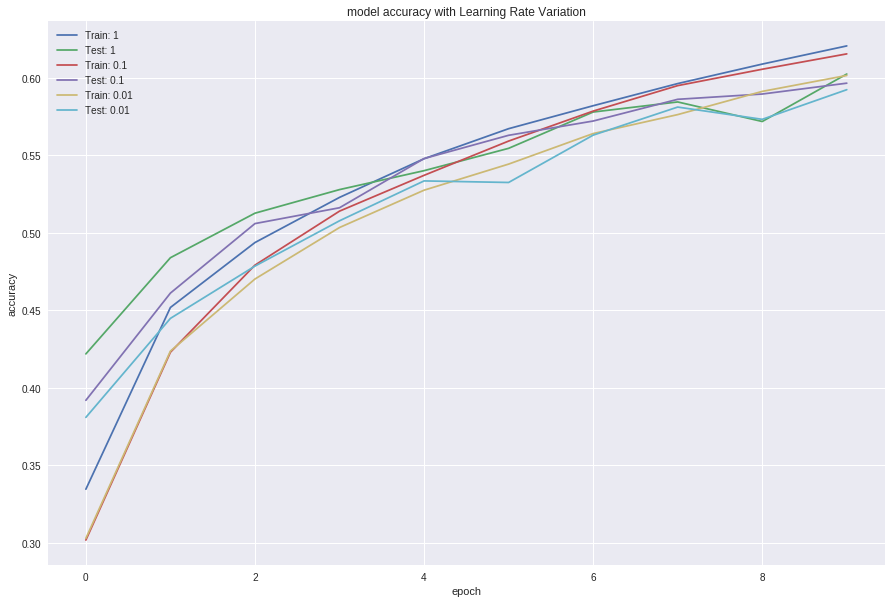

In [68]:
from google.colab import files
i=0
leg = []
fig, ax = plt.subplots()
for i in range(len(learning_vals)-4):
  plt.plot(train_acc_vals[i])
  leg.append(str('Train: ' + str(learning_vals[i])))
  plt.plot(test_acc_vals[i])
  leg.append(str('Test: ' + str(learning_vals[i])))
  i+=1
plt.title('model accuracy with Learning Rate Variation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(leg, loc='best')
fig.set_size_inches(15, 10)
plt.savefig("learningb.jpg")
files.download("learningb.jpg")
plt.show()

In [52]:
#@title Default title text
from google.colab import files
files.download("learning.jpg")
import os
print( os.getcwd() )
print( os.listdir('.') )

/content
['datalab', '.keras', '.nv', 'learning.jpg', '.ipython', '.forever', '.cache', '.config', '.rnd', '.local']


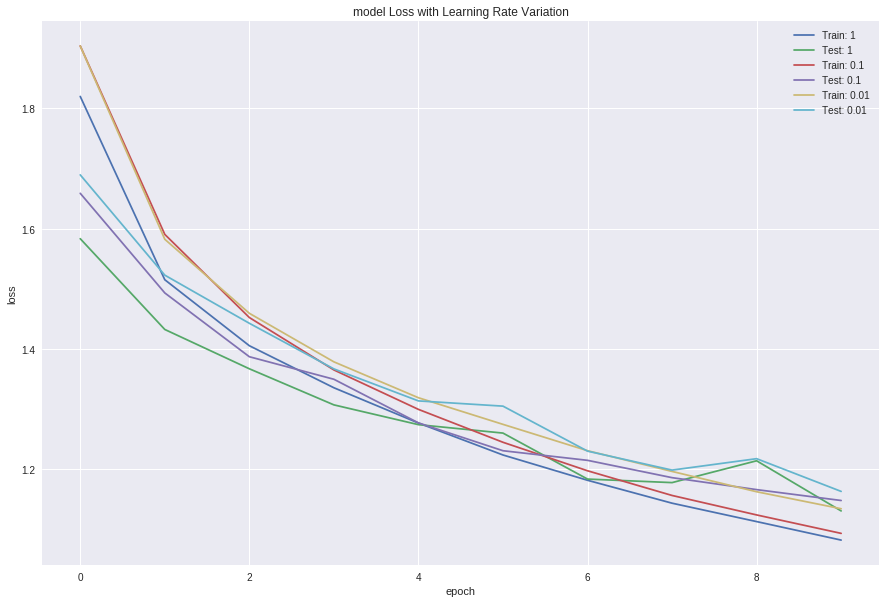

In [71]:
from google.colab import files
i=0
leg = []
fig, ax = plt.subplots()
for i in range(len(learning_vals)-4):
  plt.plot(train_loss_vals[i])
  leg.append(str('Train: ' + str(learning_vals[i])))
  plt.plot(test_loss_vals[i])
  leg.append(str('Test: ' + str(learning_vals[i])))
  i+=1
plt.title('model Loss with Learning Rate Variation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(leg, loc='best')
fig.set_size_inches(15, 10)
plt.savefig("learning2b.jpg")
files.download("learning2b.jpg")
plt.show()

In [0]:
bt=100
u=1
batch_variate = []
for e in range(2):
  batch_variate.append(bt)
  if e%2==1:
    bt*=5
  else:
    bt*=10

In [17]:
batch_variate

[100, 1000]

In [27]:
conv_layer = [0,1,2,3]
#@title Default title text
def fn(learning_rate, lr_weight_decay, size):
  model = Sequential()                                                #-- Sequential container.

  model.add(Convolution2D(6, 5, 5,                                    #-- 6 outputs (6 filters), 5x5 convolution kernel
                          border_mode='valid',
                          input_shape=( img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
  for e in range(size):
    model.add(Convolution2D(6+2*e, 2, 2))                                  #-- 16 outputs (16 filters), 5x5 convolution kernel
    model.add(Activation('relu'))                                       #-- ReLU non-linearity
    model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows


  model.add(Convolution2D(16, 5, 5))                                  #-- 16 outputs (16 filters), 5x5 convolution kernel
  model.add(Activation('relu'))                                       #-- ReLU non-linearity
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

  model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
  model.add(Dense(120))                                               #-- 120 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(84))                                                #-- 84 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
  model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems

  print(model.summary())
  sgd = SGD(lr=learning_rate, decay = lr_weight_decay)
  model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

  #-- switch verbose=0 if you get error "I/O operation from closed file"
  history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
          verbose=1, shuffle=True, validation_data=(X_test, Y_test))
  return history
conv_models = []
for x in range(len(conv_layer)):
  conv_models.append(fn(0.001, 0.95,conv_layer[x]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(32, 32, 3..., padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_73 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_74 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 400)               0         
__________

50000/50000 [==============================] - 10s 205us/step - loss: 1.7891 - acc: 0.3485 - val_loss: 1.6201 - val_acc: 0.4164
Epoch 2/10
50000/50000 [==============================] - 10s 198us/step - loss: 1.5245 - acc: 0.4468 - val_loss: 1.4478 - val_acc: 0.4799
Epoch 3/10
41550/50000 [=======================>......] - ETA: 1s - loss: 1.4218 - acc: 0.4894

50000/50000 [==============================] - 10s 199us/step - loss: 1.4130 - acc: 0.4936 - val_loss: 1.3795 - val_acc: 0.5073
Epoch 4/10
50000/50000 [==============================] - 10s 197us/step - loss: 1.3349 - acc: 0.5236 - val_loss: 1.3342 - val_acc: 0.5231
Epoch 5/10
48000/50000 [===========================>..] - ETA: 0s - loss: 1.2743 - acc: 0.5479

50000/50000 [==============================] - 10s 198us/step - loss: 1.2738 - acc: 0.5479 - val_loss: 1.2650 - val_acc: 0.5519
Epoch 6/10
50000/50000 [==============================] - 10s 197us/step - loss: 1.2247 - acc: 0.5680 - val_loss: 1.2396 - val_acc: 0.5596
Epoch 7/10
49650/50000 [============================>.] - ETA: 0s - loss: 1.1849 - acc: 0.5813

50000/50000 [==============================] - 10s 198us/step - loss: 1.1857 - acc: 0.5812 - val_loss: 1.2074 - val_acc: 0.5698
Epoch 8/10
50000/50000 [==============================] - 10s 199us/step - loss: 1.1542 - acc: 0.5936 - val_loss: 1.1928 - val_acc: 0.5813
Epoch 9/10
49450/50000 [============================>.] - ETA: 0s - loss: 1.1279 - acc: 0.6040

50000/50000 [==============================] - 10s 199us/step - loss: 1.1272 - acc: 0.6042 - val_loss: 1.1545 - val_acc: 0.5948
Epoch 10/10
50000/50000 [==============================] - 10s 198us/step - loss: 1.0982 - acc: 0.6125 - val_loss: 1.1572 - val_acc: 0.5910
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_78 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 13, 13, 6)         150       
_________________________________________________________________
activation_79 (Activation)   (None, 13, 13, 6)         0         
______

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (2, 2))`
  if sys.path[0] == '':


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 223us/step - loss: 2.0447 - acc: 0.2492 - val_loss: 1.8352 - val_acc: 0.3236
Epoch 2/10
50000/50000 [==============================] - 10s 210us/step - loss: 1.7595 - acc: 0.3528 - val_loss: 1.6946 - val_acc: 0.3731
Epoch 3/10
14700/50000 [=======>......................] - ETA: 7s - loss: 1.6744 - acc: 0.3893

50000/50000 [==============================] - 11s 212us/step - loss: 1.6489 - acc: 0.3946 - val_loss: 1.5992 - val_acc: 0.4078
Epoch 4/10
50000/50000 [==============================] - 11s 213us/step - loss: 1.5685 - acc: 0.4232 - val_loss: 1.5249 - val_acc: 0.4426
Epoch 5/10
37750/50000 [=====================>........] - ETA: 2s - loss: 1.5179 - acc: 0.4441

50000/50000 [==============================] - 11s 213us/step - loss: 1.5128 - acc: 0.4466 - val_loss: 1.5443 - val_acc: 0.4308
Epoch 6/10
50000/50000 [==============================] - 11s 211us/step - loss: 1.4684 - acc: 0.4663 - val_loss: 1.4566 - val_acc: 0.4664
Epoch 7/10
42700/50000 [========================>.....] - ETA: 1s - loss: 1.4333 - acc: 0.4787

50000/50000 [==============================] - 11s 214us/step - loss: 1.4304 - acc: 0.4805 - val_loss: 1.4193 - val_acc: 0.4825
Epoch 8/10
50000/50000 [==============================] - 11s 212us/step - loss: 1.3973 - acc: 0.4956 - val_loss: 1.3882 - val_acc: 0.4900
Epoch 9/10
43650/50000 [=========================>....] - ETA: 1s - loss: 1.3712 - acc: 0.5055

50000/50000 [==============================] - 11s 213us/step - loss: 1.3692 - acc: 0.5063 - val_loss: 1.3739 - val_acc: 0.4927
Epoch 10/10
50000/50000 [==============================] - 11s 213us/step - loss: 1.3442 - acc: 0.5164 - val_loss: 1.3672 - val_acc: 0.5034


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (2, 2))`
  if sys.path[0] == '':


ValueError: ignored

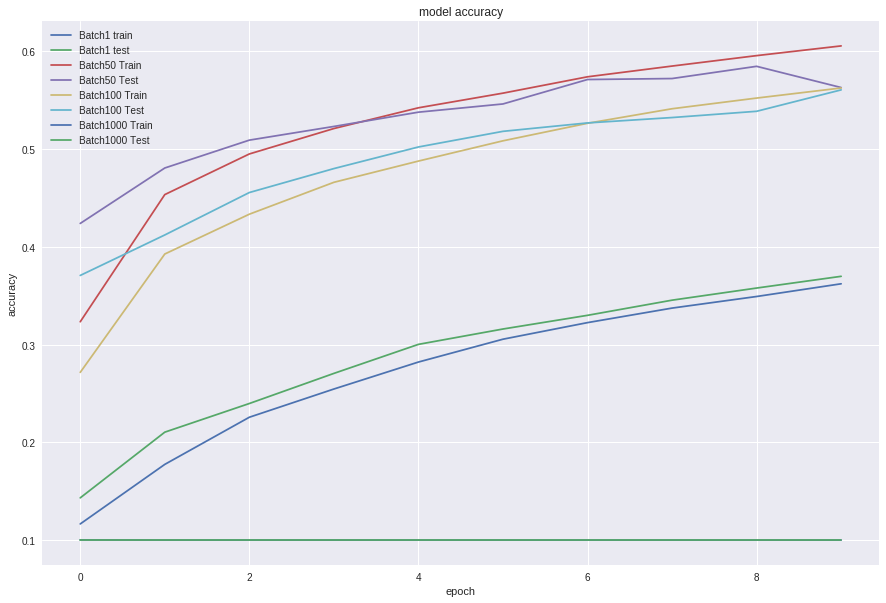

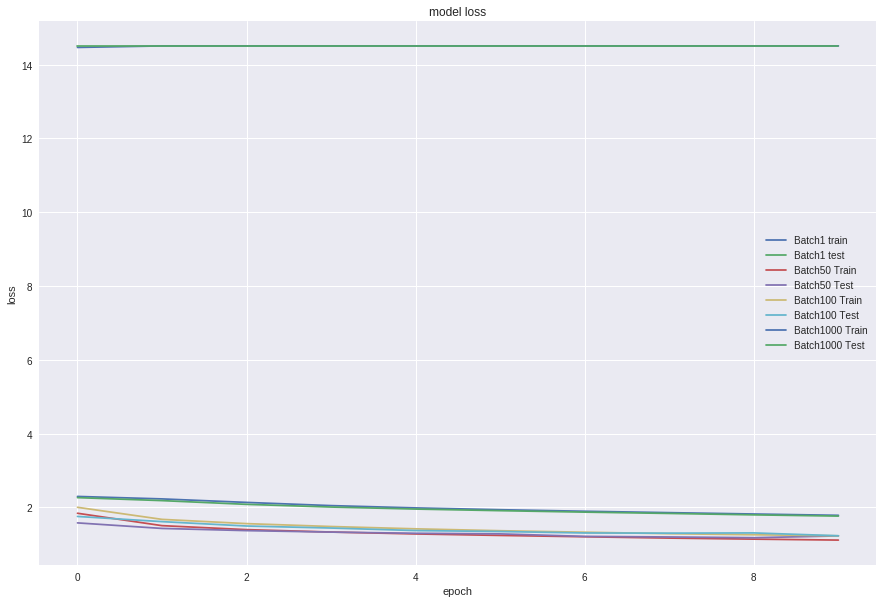

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
#-- summarize history for accuracy
for r in range(len(batch)):
  plt.plot(final[r].history['acc'])
  plt.plot(final[r].history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Batch1 train', 'Batch1 test', 'Batch50 Train', 'Batch50 Test', 'Batch100 Train', 'Batch100 Test', 'Batch1000 Train', 'Batch1000 Test'], loc='best')
plt.savefig("q1b_61.jpg")
plt.show()
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
#-- summarize history for loss
for r in range(len(batch)):
  plt.plot(final[r].history['loss'])
  plt.plot(final[r].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Batch1 train', 'Batch1 test', 'Batch50 Train', 'Batch50 Test', 'Batch100 Train', 'Batch100 Test', 'Batch1000 Train', 'Batch1000 Test'], loc='best')
plt.savefig("q1b_62.jpg")
plt.show()

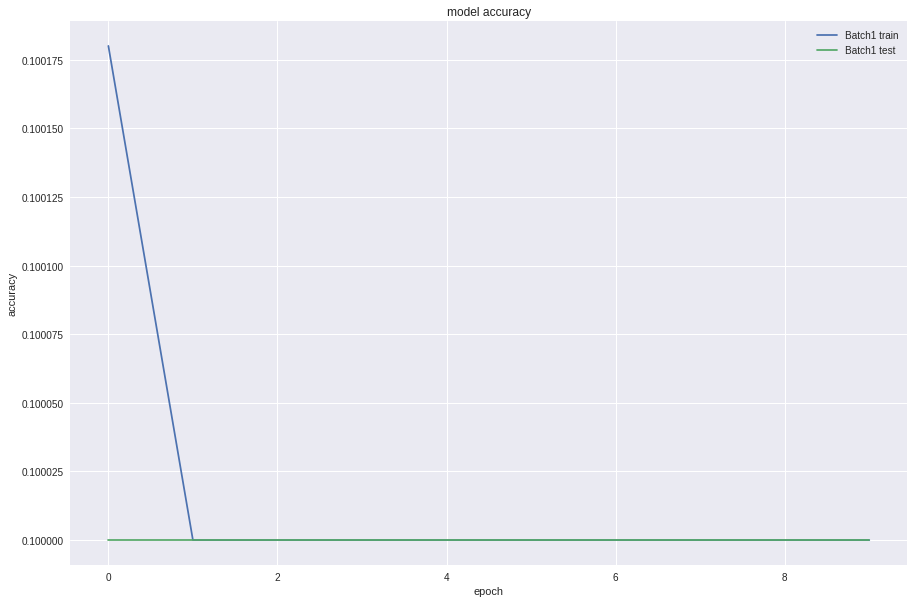

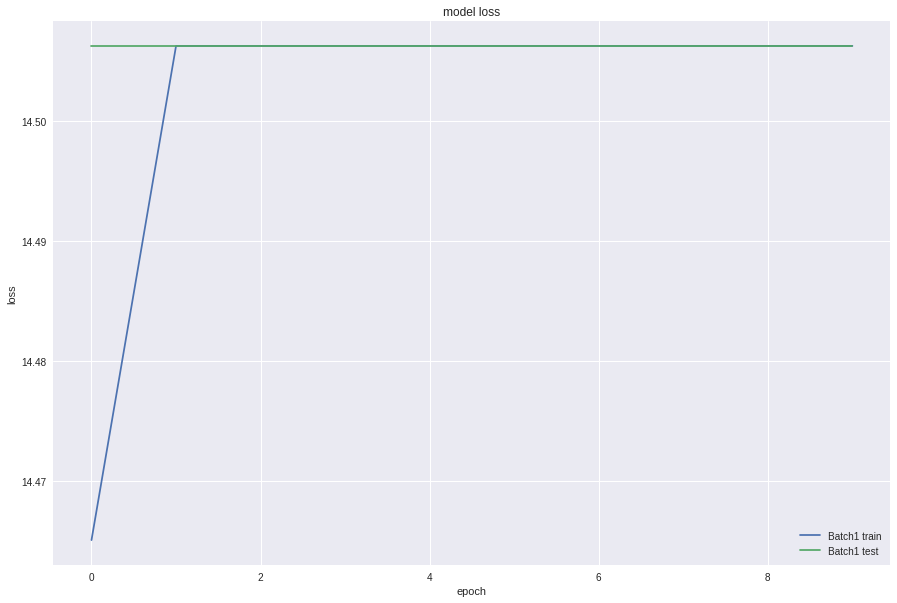

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
#-- summarize history for accuracy
for r in range(1):
  plt.plot(final[r].history['acc'])
  plt.plot(final[r].history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Batch1 train', 'Batch1 test'], loc='best')
plt.savefig("q1b_61_batch1.jpg")
plt.show()
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
#-- summarize history for loss
for r in range(1):
  plt.plot(final[r].history['loss'])
  plt.plot(final[r].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Batch1 train', 'Batch1 test', 'Batch50 Train', 'Batch50 Test', 'Batch100 Train', 'Batch100 Test', 'Batch1000 Train', 'Batch1000 Test'], loc='best')
plt.savefig("q1b_62_batch1.jpg")
plt.show()

In [37]:
for r in range(4):
  print(batch[r])
  print(final[r].history)

1
{'val_loss': [14.506285870075226, 14.506285870075226, 14.506285870075226, 14.506285870075226, 14.506285870075226, 14.506285870075226, 14.506285870075226, 14.506285870075226, 14.506285870075226, 14.506285870075226], 'val_acc': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], 'loss': [14.46511744915381, 14.506285870075226, 14.506285870075226, 14.506285870075226, 14.506285870075226, 14.506285870075226, 14.506285870075226, 14.506285870075226, 14.506285870075226, 14.506285870075226], 'acc': [0.10018, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}
50
{'val_loss': [1.581341672539711, 1.4310378068685532, 1.3718415009975433, 1.331792195737362, 1.299601812660694, 1.2830719849467278, 1.2155967873334885, 1.1996089366078377, 1.1797607660293579, 1.2286792367696762], 'val_acc': [0.42390000008046624, 0.48059999868273734, 0.5090999980270863, 0.523099999576807, 0.5376999999582768, 0.5461000016331673, 0.5711000031232834, 0.572100002616644, 0.5846000038087368, 0.5628999997675419], 'loss': [1.842349434

In [18]:
def fn(learning_rate, lr_weight_decay, batchSize):
  model = Sequential()                                                #-- Sequential container.

  model.add(Convolution2D(6, 5, 5,                                    #-- 6 outputs (6 filters), 5x5 convolution kernel
                          border_mode='valid',
                          input_shape=( img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
  model.add(Convolution2D(16, 5, 5))                                  #-- 16 outputs (16 filters), 5x5 convolution kernel
  model.add(Activation('relu'))                                       #-- ReLU non-linearity
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

  model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
  model.add(Dense(120))                                               #-- 120 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(84))                                                #-- 84 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
  model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems

  print(model.summary())
  sgd = SGD(lr=learning_rate, decay = lr_weight_decay)
  model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

  #-- switch verbose=0 if you get error "I/O operation from closed file"
  history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
          verbose=1, shuffle=True, validation_data=(X_test, Y_test))
  return history
batch_models = []
for x in range(len(batch_variate)):
  batch_models.append(fn(0.001, 0.95,batch_variate[x]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(32, 32, 3..., padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5))`
  if __name__ == '__main__':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_12 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
__________

50000/50000 [==============================] - 58s 1ms/step - loss: 2.0035 - acc: 0.2716 - val_loss: 1.7559 - val_acc: 0.3707
Epoch 2/10
27800/50000 [===============>..............] - ETA: 23s - loss: 1.7187 - acc: 0.3782

50000/50000 [==============================] - 59s 1ms/step - loss: 1.6766 - acc: 0.3926 - val_loss: 1.6155 - val_acc: 0.4121
Epoch 3/10
36700/50000 [=====================>........] - ETA: 14s - loss: 1.5695 - acc: 0.4311

50000/50000 [==============================] - 59s 1ms/step - loss: 1.5614 - acc: 0.4333 - val_loss: 1.4965 - val_acc: 0.4555
Epoch 4/10
40100/50000 [=======================>......] - ETA: 10s - loss: 1.4889 - acc: 0.4635

50000/50000 [==============================] - 59s 1ms/step - loss: 1.4831 - acc: 0.4660 - val_loss: 1.4420 - val_acc: 0.4800
Epoch 5/10
41400/50000 [=======================>......] - ETA: 9s - loss: 1.4258 - acc: 0.4861

50000/50000 [==============================] - 59s 1ms/step - loss: 1.4203 - acc: 0.4877 - val_loss: 1.3734 - val_acc: 0.5021
Epoch 6/10
41900/50000 [========================>.....] - ETA: 8s - loss: 1.3716 - acc: 0.5073

50000/50000 [==============================] - 59s 1ms/step - loss: 1.3690 - acc: 0.5084 - val_loss: 1.3479 - val_acc: 0.5181
Epoch 7/10
42100/50000 [========================>.....] - ETA: 8s - loss: 1.3306 - acc: 0.5260

50000/50000 [==============================] - 59s 1ms/step - loss: 1.3288 - acc: 0.5263 - val_loss: 1.3079 - val_acc: 0.5267
Epoch 8/10
42200/50000 [========================>.....] - ETA: 8s - loss: 1.2905 - acc: 0.5406

50000/50000 [==============================] - 59s 1ms/step - loss: 1.2888 - acc: 0.5412 - val_loss: 1.3033 - val_acc: 0.5322
Epoch 9/10
42200/50000 [========================>.....] - ETA: 8s - loss: 1.2624 - acc: 0.5509

50000/50000 [==============================] - 59s 1ms/step - loss: 1.2598 - acc: 0.5521 - val_loss: 1.3095 - val_acc: 0.5386
Epoch 10/10
42000/50000 [========================>.....] - ETA: 8s - loss: 1.2313 - acc: 0.5614

50000/50000 [==============================] - 59s 1ms/step - loss: 1.2310 - acc: 0.5624 - val_loss: 1.2325 - val_acc: 0.5605
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_16 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_17 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 16)          0         
________________

50000/50000 [==============================] - 54s 1ms/step - loss: 2.2981 - acc: 0.1165 - val_loss: 2.2660 - val_acc: 0.1432
Epoch 2/10
50000/50000 [==============================] - 54s 1ms/step - loss: 2.2311 - acc: 0.1774 - val_loss: 2.1850 - val_acc: 0.2104
Epoch 3/10
50000/50000 [==============================] - 54s 1ms/step - loss: 2.1361 - acc: 0.2257 - val_loss: 2.0838 - val_acc: 0.2397
Epoch 4/10
50000/50000 [==============================] - 54s 1ms/step - loss: 2.0495 - acc: 0.2545 - val_loss: 2.0109 - val_acc: 0.2705
Epoch 5/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.9871 - acc: 0.2821 - val_loss: 1.9562 - val_acc: 0.3002
Epoch 6/10
14000/50000 [=======>......................] - ETA: 34s - loss: 1.9565 - acc: 0.2969

50000/50000 [==============================] - 54s 1ms/step - loss: 1.9381 - acc: 0.3055 - val_loss: 1.9127 - val_acc: 0.3159
Epoch 7/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.8965 - acc: 0.3224 - val_loss: 1.8732 - val_acc: 0.3299
Epoch 8/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.8586 - acc: 0.3373 - val_loss: 1.8376 - val_acc: 0.3454
Epoch 9/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.8220 - acc: 0.3492 - val_loss: 1.7993 - val_acc: 0.3578
Epoch 10/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.7865 - acc: 0.3622 - val_loss: 1.7660 - val_acc: 0.3698


In [9]:
model = Sequential()                                                #-- Sequential container.

model.add(Convolution2D(6, 5, 5,                                    #-- 6 outputs (6 filters), 5x5 convolution kernel
                        border_mode='valid',
                        input_shape=( img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
model.add(Activation('tanh'))                                       #-- ReLU non-linearity 
model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
model.add(Convolution2D(16, 5, 5))                                  #-- 16 outputs (16 filters), 5x5 convolution kernel
model.add(Activation('tanh'))                                       #-- ReLU non-linearity
model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
model.add(Dense(120))                                               #-- 120 outputs fully connected layer
model.add(Activation('tanh'))                                       #-- ReLU non-linearity 
model.add(Dense(84))                                                #-- 84 outputs fully connected layer
model.add(Activation('tanh'))                                       #-- ReLU non-linearity 
model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(32, 32, 3..., padding="valid")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5))`
  


In [10]:
sgd = SGD(lr=learningRate, decay = lr_weight_decay)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#-- switch verbose=0 if you get error "I/O operation from closed file"
history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
          verbose=1, shuffle=True, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 10s 210us/step - loss: 1.8509 - acc: 0.3374 - val_loss: 1.6362 - val_acc: 0.4113
Epoch 2/10
50000/50000 [==============================] - 9s 189us/step - loss: 1.5648 - acc: 0.4371 - val_loss: 1.5201 - val_acc: 0.4516
Epoch 3/10
19350/50000 [==========>...................] - ETA: 5s - loss: 1.4722 - acc: 0.4699

50000/50000 [==============================] - 9s 190us/step - loss: 1.4566 - acc: 0.4756 - val_loss: 1.4270 - val_acc: 0.4843
Epoch 4/10
50000/50000 [==============================] - 10s 194us/step - loss: 1.3844 - acc: 0.5035 - val_loss: 1.3629 - val_acc: 0.5056
Epoch 5/10
43700/50000 [=========================>....] - ETA: 1s - loss: 1.3341 - acc: 0.5225

50000/50000 [==============================] - 10s 191us/step - loss: 1.3315 - acc: 0.5244 - val_loss: 1.3810 - val_acc: 0.4986
Epoch 6/10
50000/50000 [==============================] - 10s 192us/step - loss: 1.2913 - acc: 0.5377 - val_loss: 1.3000 - val_acc: 0.5258
Epoch 7/10
49650/50000 [============================>.] - ETA: 0s - loss: 1.2557 - acc: 0.5507

50000/50000 [==============================] - 10s 190us/step - loss: 1.2553 - acc: 0.5508 - val_loss: 1.2571 - val_acc: 0.5442
Epoch 8/10
50000/50000 [==============================] - 10s 191us/step - loss: 1.2195 - acc: 0.5647 - val_loss: 1.2375 - val_acc: 0.5550
Epoch 9/10
50000/50000 [==============================] - 9s 189us/step - loss: 1.1921 - acc: 0.5759 - val_loss: 1.2259 - val_acc: 0.5619
Epoch 10/10
  350/50000 [..............................] - ETA: 9s - loss: 1.1645 - acc: 0.5857 

50000/50000 [==============================] - 9s 186us/step - loss: 1.1629 - acc: 0.5862 - val_loss: 1.2071 - val_acc: 0.5708


In [11]:
model = Sequential()                                                #-- Sequential container.

model.add(Convolution2D(6, 5, 5,                                    #-- 6 outputs (6 filters), 5x5 convolution kernel
                        border_mode='valid',
                        input_shape=( img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
model.add(Activation('sigmoid'))                                       #-- ReLU non-linearity 
model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
model.add(Convolution2D(16, 5, 5))                                  #-- 16 outputs (16 filters), 5x5 convolution kernel
model.add(Activation('sigmoid'))                                       #-- ReLU non-linearity
model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
model.add(Dense(120))                                               #-- 120 outputs fully connected layer
model.add(Activation('sigmoid'))                                       #-- ReLU non-linearity 
model.add(Dense(84))                                                #-- 84 outputs fully connected layer
model.add(Activation('sigmoid'))                                       #-- ReLU non-linearity 
model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems

print(model.summary())
sgd = SGD(lr=learningRate, decay = lr_weight_decay)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#-- switch verbose=0 if you get error "I/O operation from closed file"
history2 = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
          verbose=1, shuffle=True, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(32, 32, 3..., padding="valid")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_7 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
__________

50000/50000 [==============================] - 10s 195us/step - loss: 2.3048 - acc: 0.0993 - val_loss: 2.3030 - val_acc: 0.1000
Epoch 2/10
50000/50000 [==============================] - 10s 192us/step - loss: 2.3036 - acc: 0.0975 - val_loss: 2.3035 - val_acc: 0.0996
Epoch 3/10
42300/50000 [========================>.....] - ETA: 1s - loss: 2.3030 - acc: 0.1006

50000/50000 [==============================] - 10s 194us/step - loss: 2.3030 - acc: 0.1005 - val_loss: 2.3017 - val_acc: 0.1000
Epoch 4/10
50000/50000 [==============================] - 10s 190us/step - loss: 2.3023 - acc: 0.1039 - val_loss: 2.3019 - val_acc: 0.1004
Epoch 5/10
49950/50000 [============================>.] - ETA: 0s - loss: 2.3010 - acc: 0.1087

50000/50000 [==============================] - 9s 190us/step - loss: 2.3010 - acc: 0.1087 - val_loss: 2.2995 - val_acc: 0.1000
Epoch 6/10
50000/50000 [==============================] - 9s 190us/step - loss: 2.2993 - acc: 0.1160 - val_loss: 2.2986 - val_acc: 0.1000
Epoch 7/10
50000/50000 [==============================] - 10s 191us/step - loss: 2.2960 - acc: 0.1267 - val_loss: 2.2943 - val_acc: 0.1391
Epoch 8/10
  650/50000 [..............................] - ETA: 9s - loss: 2.2923 - acc: 0.1585

50000/50000 [==============================] - 10s 191us/step - loss: 2.2900 - acc: 0.1461 - val_loss: 2.2849 - val_acc: 0.1480
Epoch 9/10
50000/50000 [==============================] - 10s 191us/step - loss: 2.2768 - acc: 0.1676 - val_loss: 2.2646 - val_acc: 0.1838
Epoch 10/10
39500/50000 [======================>.......] - ETA: 1s - loss: 2.2512 - acc: 0.1924

50000/50000 [==============================] - 10s 192us/step - loss: 2.2460 - acc: 0.1937 - val_loss: 2.2162 - val_acc: 0.2150


In [14]:
model = Sequential()                                                #-- Sequential container.

model.add(Convolution2D(6, 5, 5,                                    #-- 6 outputs (6 filters), 5x5 convolution kernel
                        border_mode='valid',
                        input_shape=( img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
model.add(Activation('relu'))                                       #-- ReLU non-linearity 
model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
model.add(Convolution2D(16, 5, 5))                                  #-- 16 outputs (16 filters), 5x5 convolution kernel
model.add(Activation('relu'))                                       #-- ReLU non-linearity
model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
model.add(Dense(120))                                               #-- 120 outputs fully connected layer
model.add(Activation('relu'))                                       #-- ReLU non-linearity 
model.add(Dense(84))                                                #-- 84 outputs fully connected layer
model.add(Activation('relu'))                                       #-- ReLU non-linearity 
model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems

print(model.summary())

sgd = SGD(lr=learningRate, decay = lr_weight_decay)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#-- switch verbose=0 if you get error "I/O operation from closed file"
history3 = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
          verbose=1, shuffle=True, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(32, 32, 3..., padding="valid")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_12 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
__________

50000/50000 [==============================] - 10s 194us/step - loss: 1.9191 - acc: 0.2999 - val_loss: 1.6090 - val_acc: 0.4165
Epoch 2/10
50000/50000 [==============================] - 10s 192us/step - loss: 1.5381 - acc: 0.4412 - val_loss: 1.4855 - val_acc: 0.4627
Epoch 3/10
42650/50000 [========================>.....] - ETA: 1s - loss: 1.4253 - acc: 0.4853

50000/50000 [==============================] - 10s 191us/step - loss: 1.4208 - acc: 0.4867 - val_loss: 1.3632 - val_acc: 0.5057
Epoch 4/10
50000/50000 [==============================] - 10s 192us/step - loss: 1.3401 - acc: 0.5217 - val_loss: 1.3158 - val_acc: 0.5343
Epoch 5/10
49150/50000 [============================>.] - ETA: 0s - loss: 1.2810 - acc: 0.5441

50000/50000 [==============================] - 10s 192us/step - loss: 1.2801 - acc: 0.5443 - val_loss: 1.2544 - val_acc: 0.5483
Epoch 6/10
50000/50000 [==============================] - 10s 196us/step - loss: 1.2311 - acc: 0.5671 - val_loss: 1.2307 - val_acc: 0.5656
Epoch 7/10
49900/50000 [============================>.] - ETA: 0s - loss: 1.1884 - acc: 0.5793

50000/50000 [==============================] - 10s 195us/step - loss: 1.1882 - acc: 0.5795 - val_loss: 1.2137 - val_acc: 0.5710
Epoch 8/10
50000/50000 [==============================] - 10s 193us/step - loss: 1.1550 - acc: 0.5942 - val_loss: 1.1616 - val_acc: 0.5862
Epoch 9/10
50000/50000 [==============================] - 10s 193us/step - loss: 1.1207 - acc: 0.6083 - val_loss: 1.1863 - val_acc: 0.5817
Epoch 10/10
   50/50000 [..............................] - ETA: 15s - loss: 1.2379 - acc: 0.5000

50000/50000 [==============================] - 10s 191us/step - loss: 1.0949 - acc: 0.6155 - val_loss: 1.1167 - val_acc: 0.6061


In [15]:
history3

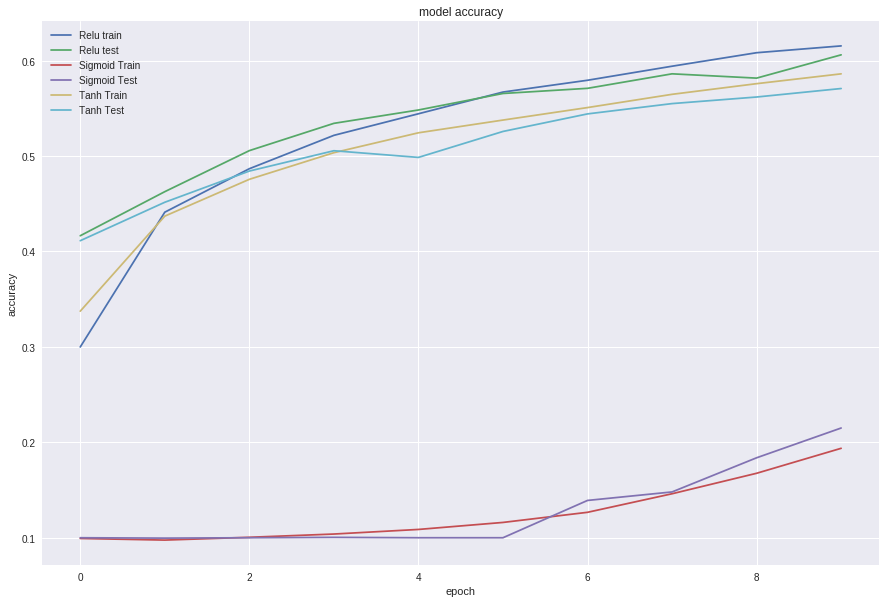

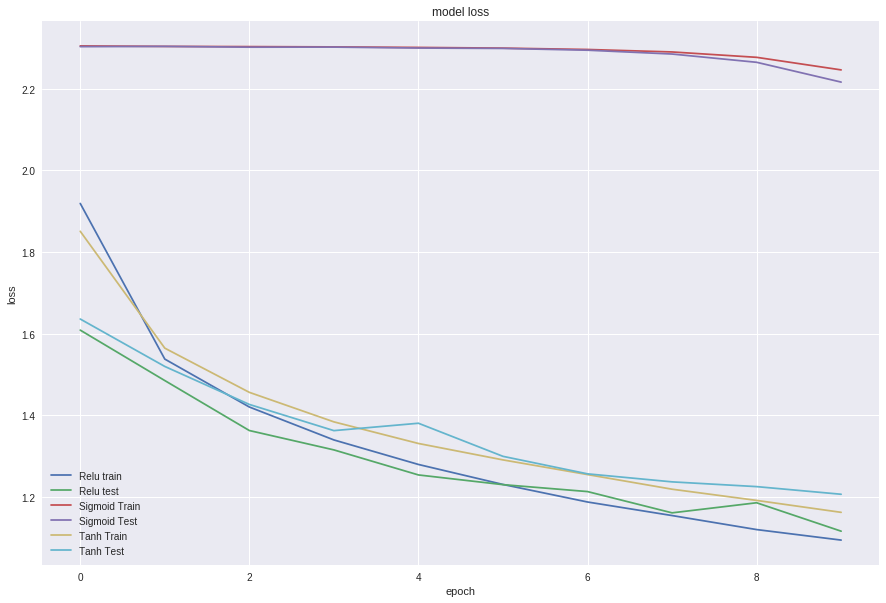

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
#-- summarize history for accuracy
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Relu train', 'Relu test', 'Sigmoid Train', 'Sigmoid Test', 'Tanh Train', 'Tanh Test'], loc='best')
plt.savefig("q1b_activation1.jpg")
plt.show()
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
#-- summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Relu train', 'Relu test', 'Sigmoid Train', 'Sigmoid Test', 'Tanh Train', 'Tanh Test'], loc='best')
plt.savefig("q1b_activation2.jpg")
plt.show()

In [0]:
from google.colab import files

In [0]:
files.download("q1b_62_batch1.jpg")

In [14]:
_batch_models[0].history

{'acc': [0.10018, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
 'loss': [14.46511744915381,
  14.506285870075226,
  14.506285870075226,
  14.506285870075226,
  14.506285870075226,
  14.506285870075226,
  14.506285870075226,
  14.506285870075226,
  14.506285870075226,
  14.506285870075226],
 'val_acc': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
 'val_loss': [14.506285870075226,
  14.506285870075226,
  14.506285870075226,
  14.506285870075226,
  14.506285870075226,
  14.506285870075226,
  14.506285870075226,
  14.506285870075226,
  14.506285870075226,
  14.506285870075226]}

In [0]:
p2=batch_models[0]

In [0]:
final = [p2, history, batch_models[0], batch_models[1]]

In [0]:
batch = [1,50,100,1000]

In [32]:
conv_models[0].history

{'acc': [0.348480000410229,
  0.4467999991923571,
  0.4935999997705221,
  0.5236199995279313,
  0.5479400008618832,
  0.5679800031781197,
  0.5811800027191639,
  0.5935800027251243,
  0.60422000426054,
  0.6125400041639805],
 'loss': [1.7890896735191346,
  1.5245036739110946,
  1.4130421621203422,
  1.3349196457266808,
  1.273790708899498,
  1.2246827963590623,
  1.1857110386490821,
  1.154178968667984,
  1.1272256307005881,
  1.0982183555364609],
 'val_acc': [0.4164000003784895,
  0.47990000039339065,
  0.5072999987006187,
  0.5230999991297722,
  0.5519000025093556,
  0.5596000000834465,
  0.5698000027239323,
  0.581300001591444,
  0.5948000013828277,
  0.5910000041127205],
 'val_loss': [1.6201427048444748,
  1.4478331542015075,
  1.3794869101047516,
  1.3341988575458528,
  1.2649883794784547,
  1.2395606526732446,
  1.2074065253138542,
  1.192839646935463,
  1.1545176419615746,
  1.1571861192584039]}

In [34]:
conv_filters = [0,1,2,3]
#@title Default title text
def fn(learning_rate, lr_weight_decay, size):
  model = Sequential()                                                #-- Sequential container.

  model.add(Convolution2D(6, 5, 5,                                    #-- 6 outputs (6 filters), 5x5 convolution kernel
                          border_mode='valid',
                          input_shape=( img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

  model.add(Convolution2D(6 + 10 * size, 5, 5))                                  #-- 16 outputs (16 filters), 5x5 convolution kernel
  model.add(Activation('relu'))                                       #-- ReLU non-linearity
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

  model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
  model.add(Dense(120))                                               #-- 120 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(84))                                                #-- 84 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
  model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems

  print(model.summary())
  sgd = SGD(lr=learning_rate, decay = lr_weight_decay)
  model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

  #-- switch verbose=0 if you get error "I/O operation from closed file"
  history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
          verbose=1, shuffle=True, validation_data=(X_test, Y_test))
  return history
fil_models = []
for x in range(len(conv_filters)):
  fil_models.append(fn(0.001, 0.95,conv_filters[x]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(32, 32, 3..., padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5))`
  if sys.path[0] == '':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_92 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 10, 10, 6)         906       
_________________________________________________________________
activation_93 (Activation)   (None, 10, 10, 6)         0         
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 5, 5, 6)           0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 150)               0         
__________

50000/50000 [==============================] - 10s 208us/step - loss: 1.8800 - acc: 0.3132 - val_loss: 1.6145 - val_acc: 0.4117
Epoch 2/10
50000/50000 [==============================] - 10s 200us/step - loss: 1.5499 - acc: 0.4373 - val_loss: 1.5051 - val_acc: 0.4531
Epoch 3/10
41250/50000 [=======================>......] - ETA: 1s - loss: 1.4692 - acc: 0.4679

50000/50000 [==============================] - 10s 200us/step - loss: 1.4623 - acc: 0.4717 - val_loss: 1.4609 - val_acc: 0.4756
Epoch 4/10
50000/50000 [==============================] - 10s 200us/step - loss: 1.4032 - acc: 0.4963 - val_loss: 1.3878 - val_acc: 0.4973
Epoch 5/10
47800/50000 [===========================>..] - ETA: 0s - loss: 1.3510 - acc: 0.5141

50000/50000 [==============================] - 10s 198us/step - loss: 1.3499 - acc: 0.5149 - val_loss: 1.3411 - val_acc: 0.5176
Epoch 6/10
50000/50000 [==============================] - 10s 199us/step - loss: 1.2997 - acc: 0.5362 - val_loss: 1.2829 - val_acc: 0.5413
Epoch 7/10
49400/50000 [============================>.] - ETA: 0s - loss: 1.2602 - acc: 0.5517

50000/50000 [==============================] - 10s 200us/step - loss: 1.2598 - acc: 0.5520 - val_loss: 1.2684 - val_acc: 0.5463
Epoch 8/10
50000/50000 [==============================] - 10s 197us/step - loss: 1.2240 - acc: 0.5645 - val_loss: 1.2236 - val_acc: 0.5604
Epoch 9/10
49750/50000 [============================>.] - ETA: 0s - loss: 1.1947 - acc: 0.5758

50000/50000 [==============================] - 10s 198us/step - loss: 1.1949 - acc: 0.5758 - val_loss: 1.2003 - val_acc: 0.5650
Epoch 10/10
50000/50000 [==============================] - 10s 202us/step - loss: 1.1723 - acc: 0.5876 - val_loss: 1.3147 - val_acc: 0.5422
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_97 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_98 (Activation)   (None, 10, 10, 16)        0         
______

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5))`
  if sys.path[0] == '':


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 212us/step - loss: 1.8628 - acc: 0.3205 - val_loss: 1.6423 - val_acc: 0.4005
Epoch 2/10
50000/50000 [==============================] - 10s 201us/step - loss: 1.5515 - acc: 0.4365 - val_loss: 1.4692 - val_acc: 0.4647
Epoch 3/10
17950/50000 [=========>....................] - ETA: 6s - loss: 1.4583 - acc: 0.4701

50000/50000 [==============================] - 10s 200us/step - loss: 1.4304 - acc: 0.4850 - val_loss: 1.4117 - val_acc: 0.4922
Epoch 4/10
50000/50000 [==============================] - 10s 202us/step - loss: 1.3513 - acc: 0.5176 - val_loss: 1.3454 - val_acc: 0.5133
Epoch 5/10
42050/50000 [========================>.....] - ETA: 1s - loss: 1.2949 - acc: 0.5383

50000/50000 [==============================] - 10s 202us/step - loss: 1.2918 - acc: 0.5398 - val_loss: 1.2635 - val_acc: 0.5483
Epoch 6/10
50000/50000 [==============================] - 10s 200us/step - loss: 1.2421 - acc: 0.5591 - val_loss: 1.2389 - val_acc: 0.5559
Epoch 7/10
48000/50000 [===========================>..] - ETA: 0s - loss: 1.1953 - acc: 0.5766

50000/50000 [==============================] - 10s 200us/step - loss: 1.1948 - acc: 0.5772 - val_loss: 1.1842 - val_acc: 0.5796
Epoch 8/10
50000/50000 [==============================] - 10s 200us/step - loss: 1.1550 - acc: 0.5940 - val_loss: 1.1718 - val_acc: 0.5847
Epoch 9/10
49150/50000 [============================>.] - ETA: 0s - loss: 1.1160 - acc: 0.6052

50000/50000 [==============================] - 10s 200us/step - loss: 1.1156 - acc: 0.6055 - val_loss: 1.1307 - val_acc: 0.6029
Epoch 10/10
50000/50000 [==============================] - 10s 201us/step - loss: 1.0873 - acc: 0.6161 - val_loss: 1.1419 - val_acc: 0.5949
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_102 (Activation)  (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 10, 10, 26)        3926      
_________________________________________________________________
activation_103 (Activation)  (None, 10, 10, 26)        0         
______

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(26, (5, 5))`
  if sys.path[0] == '':


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 214us/step - loss: 1.8190 - acc: 0.3383 - val_loss: 1.5449 - val_acc: 0.4403
Epoch 2/10
50000/50000 [==============================] - 10s 202us/step - loss: 1.4808 - acc: 0.4698 - val_loss: 1.4382 - val_acc: 0.4883
Epoch 3/10
17600/50000 [=========>....................] - ETA: 6s - loss: 1.4012 - acc: 0.4992

50000/50000 [==============================] - 10s 202us/step - loss: 1.3761 - acc: 0.5073 - val_loss: 1.3362 - val_acc: 0.5293
Epoch 4/10
50000/50000 [==============================] - 10s 202us/step - loss: 1.3011 - acc: 0.5372 - val_loss: 1.2872 - val_acc: 0.5439
Epoch 5/10
42150/50000 [========================>.....] - ETA: 1s - loss: 1.2404 - acc: 0.5619

50000/50000 [==============================] - 10s 202us/step - loss: 1.2387 - acc: 0.5622 - val_loss: 1.2602 - val_acc: 0.5509
Epoch 6/10
50000/50000 [==============================] - 10s 202us/step - loss: 1.1864 - acc: 0.5834 - val_loss: 1.2477 - val_acc: 0.5617
Epoch 7/10
47400/50000 [===========================>..] - ETA: 0s - loss: 1.1401 - acc: 0.6022

50000/50000 [==============================] - 10s 203us/step - loss: 1.1392 - acc: 0.6020 - val_loss: 1.1848 - val_acc: 0.5846
Epoch 8/10
50000/50000 [==============================] - 10s 202us/step - loss: 1.1002 - acc: 0.6166 - val_loss: 1.1625 - val_acc: 0.5934
Epoch 9/10
49050/50000 [============================>.] - ETA: 0s - loss: 1.0643 - acc: 0.6255

50000/50000 [==============================] - 10s 202us/step - loss: 1.0640 - acc: 0.6256 - val_loss: 1.1281 - val_acc: 0.6045
Epoch 10/10
50000/50000 [==============================] - 10s 201us/step - loss: 1.0302 - acc: 0.6391 - val_loss: 1.1699 - val_acc: 0.5890
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_107 (Activation)  (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 10, 10, 36)        5436      
_________________________________________________________________
activation_108 (Activation)  (None, 10, 10, 36)        0         
______

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5))`
  if sys.path[0] == '':


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 221us/step - loss: 1.8173 - acc: 0.3384 - val_loss: 1.5629 - val_acc: 0.4301
Epoch 2/10
50000/50000 [==============================] - 10s 208us/step - loss: 1.4790 - acc: 0.4668 - val_loss: 1.4180 - val_acc: 0.4901
Epoch 3/10
16600/50000 [========>.....................] - ETA: 6s - loss: 1.3724 - acc: 0.5104

50000/50000 [==============================] - 10s 208us/step - loss: 1.3419 - acc: 0.5206 - val_loss: 1.3076 - val_acc: 0.5364
Epoch 4/10
50000/50000 [==============================] - 10s 208us/step - loss: 1.2445 - acc: 0.5600 - val_loss: 1.2401 - val_acc: 0.5618
Epoch 5/10
40300/50000 [=======================>......] - ETA: 1s - loss: 1.1681 - acc: 0.5891

50000/50000 [==============================] - 10s 209us/step - loss: 1.1679 - acc: 0.5895 - val_loss: 1.1932 - val_acc: 0.5842
Epoch 6/10
50000/50000 [==============================] - 10s 209us/step - loss: 1.1096 - acc: 0.6093 - val_loss: 1.1180 - val_acc: 0.6110
Epoch 7/10
45950/50000 [==========================>...] - ETA: 0s - loss: 1.0571 - acc: 0.6293

50000/50000 [==============================] - 10s 207us/step - loss: 1.0580 - acc: 0.6294 - val_loss: 1.1063 - val_acc: 0.6185
Epoch 8/10
50000/50000 [==============================] - 10s 207us/step - loss: 1.0183 - acc: 0.6461 - val_loss: 1.0824 - val_acc: 0.6266
Epoch 9/10
47550/50000 [===========================>..] - ETA: 0s - loss: 0.9762 - acc: 0.6604

50000/50000 [==============================] - 10s 206us/step - loss: 0.9776 - acc: 0.6600 - val_loss: 1.0449 - val_acc: 0.6356
Epoch 10/10
50000/50000 [==============================] - 10s 206us/step - loss: 0.9480 - acc: 0.6709 - val_loss: 1.0595 - val_acc: 0.6334


In [36]:
fil_models

In [38]:
fil_models.append(fn(0.001, 0.95,10))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(32, 32, 3..., padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(106, (5, 5))`
  if sys.path[0] == '':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_117 (Activation)  (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 10, 10, 106)       16006     
_________________________________________________________________
activation_118 (Activation)  (None, 10, 10, 106)       0         
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 5, 5, 106)         0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 2650)              0         
__________

50000/50000 [==============================] - 13s 253us/step - loss: 1.8055 - acc: 0.3497 - val_loss: 1.5352 - val_acc: 0.4411
Epoch 2/10
50000/50000 [==============================] - 12s 232us/step - loss: 1.4365 - acc: 0.4837 - val_loss: 1.3913 - val_acc: 0.5009
Epoch 3/10
28400/50000 [================>.............] - ETA: 4s - loss: 1.3133 - acc: 0.5331

50000/50000 [==============================] - 12s 232us/step - loss: 1.2855 - acc: 0.5440 - val_loss: 1.2646 - val_acc: 0.5511
Epoch 4/10
50000/50000 [==============================] - 12s 231us/step - loss: 1.1849 - acc: 0.5816 - val_loss: 1.1576 - val_acc: 0.5975
Epoch 5/10
32550/50000 [==================>...........] - ETA: 3s - loss: 1.1139 - acc: 0.6103

50000/50000 [==============================] - 12s 233us/step - loss: 1.1030 - acc: 0.6135 - val_loss: 1.1595 - val_acc: 0.5969
Epoch 6/10
50000/50000 [==============================] - 12s 233us/step - loss: 1.0378 - acc: 0.6381 - val_loss: 1.0781 - val_acc: 0.6279
Epoch 7/10
33150/50000 [==================>...........] - ETA: 3s - loss: 0.9776 - acc: 0.6633

50000/50000 [==============================] - 12s 233us/step - loss: 0.9818 - acc: 0.6598 - val_loss: 1.0719 - val_acc: 0.6327
Epoch 8/10
50000/50000 [==============================] - 12s 234us/step - loss: 0.9295 - acc: 0.6765 - val_loss: 1.0361 - val_acc: 0.6454
Epoch 9/10
33500/50000 [===================>..........] - ETA: 3s - loss: 0.8801 - acc: 0.6961

50000/50000 [==============================] - 12s 233us/step - loss: 0.8792 - acc: 0.6952 - val_loss: 1.0172 - val_acc: 0.6505
Epoch 10/10
50000/50000 [==============================] - 12s 231us/step - loss: 0.8370 - acc: 0.7097 - val_loss: 1.0590 - val_acc: 0.6440


In [39]:
fil_models.append(fn(0.001, 0.95,100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(32, 32, 3..., padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1006, (5, 5))`
  if sys.path[0] == '':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_122 (Activation)  (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 10, 10, 1006)      151906    
_________________________________________________________________
activation_123 (Activation)  (None, 10, 10, 1006)      0         
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 5, 5, 1006)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 25150)             0         
__________

50000/50000 [==============================] - 22s 436us/step - loss: 1.7751 - acc: 0.3600 - val_loss: 1.5011 - val_acc: 0.4533
Epoch 2/10
50000/50000 [==============================] - 21s 418us/step - loss: 1.4077 - acc: 0.5012 - val_loss: 1.3086 - val_acc: 0.5329
Epoch 3/10
  200/50000 [..............................] - ETA: 21s - loss: 1.3644 - acc: 0.5450

50000/50000 [==============================] - 21s 418us/step - loss: 1.2412 - acc: 0.5645 - val_loss: 1.1741 - val_acc: 0.5911
Epoch 4/10
48500/50000 [============================>.] - ETA: 0s - loss: 1.1164 - acc: 0.6073

50000/50000 [==============================] - 21s 417us/step - loss: 1.1147 - acc: 0.6079 - val_loss: 1.1276 - val_acc: 0.6046
Epoch 5/10
50000/50000 [==============================] - 21s 420us/step - loss: 1.0126 - acc: 0.6492 - val_loss: 1.0625 - val_acc: 0.6239
Epoch 6/10
10100/50000 [=====>........................] - ETA: 15s - loss: 0.9303 - acc: 0.6797

50000/50000 [==============================] - 21s 417us/step - loss: 0.9254 - acc: 0.6793 - val_loss: 1.0179 - val_acc: 0.6542
Epoch 7/10
50000/50000 [==============================] - 21s 417us/step - loss: 0.8416 - acc: 0.7112 - val_loss: 1.0350 - val_acc: 0.6497
Epoch 8/10
 1250/50000 [..............................] - ETA: 19s - loss: 0.7093 - acc: 0.7592

50000/50000 [==============================] - 21s 418us/step - loss: 0.7583 - acc: 0.7400 - val_loss: 1.0246 - val_acc: 0.6528
Epoch 9/10
48800/50000 [============================>.] - ETA: 0s - loss: 0.6830 - acc: 0.7644

50000/50000 [==============================] - 21s 416us/step - loss: 0.6817 - acc: 0.7648 - val_loss: 1.0012 - val_acc: 0.6699
Epoch 10/10
50000/50000 [==============================] - 21s 417us/step - loss: 0.6005 - acc: 0.7938 - val_loss: 0.9559 - val_acc: 0.6818


In [0]:
filter_check = [fil_models[0], fil_models[1], fil_models[4], fil_models[5]]

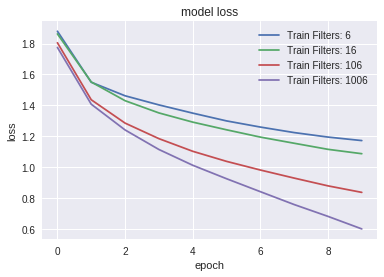

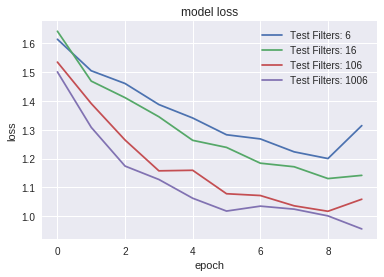

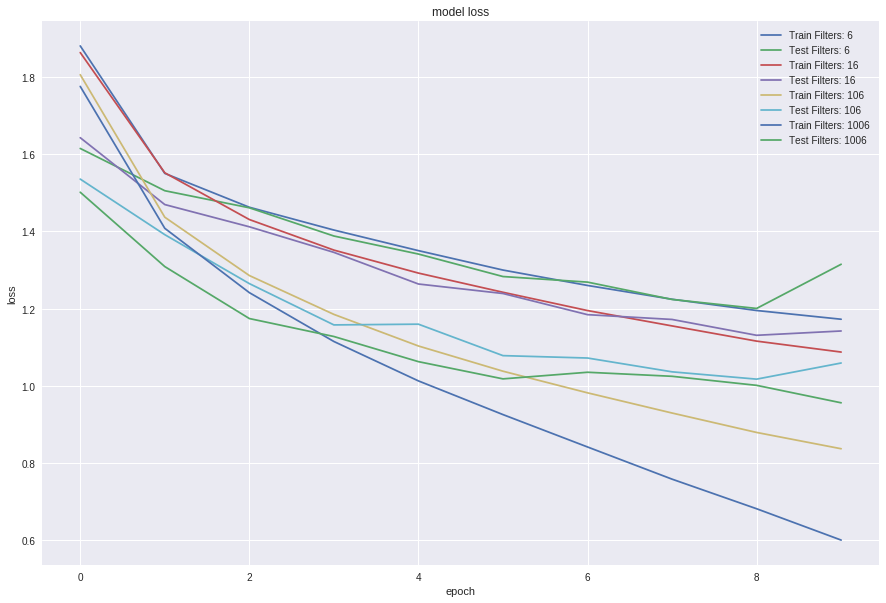

In [50]:
fig, ax = plt.subplots()
#-- summarize history for accuracy
for r in range(4):
  plt.plot(filter_check[r].history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train Filters: 6', 'Train Filters: 16', 'Train Filters: 106', 'Train Filters: 1006'], loc='best')
plt.savefig("q1b_filter2_a.jpg")
plt.show()
fig, ax = plt.subplots()
#-- summarize history for accuracy
for r in range(4):
  plt.plot(filter_check[r].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Test Filters: 6','Test Filters: 16', 'Test Filters: 106', 'Test Filters: 1006'], loc='best')
plt.savefig("q1b_filter2_b.jpg")
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
#-- summarize history for loss
for r in range(4):
  plt.plot(filter_check[r].history['loss'])
  plt.plot(filter_check[r].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train Filters: 6', 'Test Filters: 6', 'Train Filters: 16', 'Test Filters: 16', 'Train Filters: 106', 'Test Filters: 106', 'Train Filters: 1006', 'Test Filters: 1006'], loc='best')
plt.savefig("q1b_filter2.jpg")
plt.show()

In [0]:
from google.colab import files
files.download("q1b_filter1.jpg")
files.download("q1b_filter1_a.jpg")
files.download("q1b_filter1_b.jpg")
files.download("q1b_filter2.jpg")
files.download("q1b_filter2_a.jpg")
files.download("q1b_filter2_b.jpg")

In [59]:
conv_layer = [0,1,2]
#@title Default title text
def fn(learning_rate, lr_weight_decay, size):
  model = Sequential()                                                #-- Sequential container.

  model.add(Convolution2D(6, 5, 5,                                    #-- 6 outputs (6 filters), 5x5 convolution kernel
                          border_mode='valid',
                          input_shape=( img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
  for e in range(size):
    model.add(Convolution2D(8, 2, 2))                                  #-- 16 outputs (16 filters), 5x5 convolution kernel
    model.add(Activation('relu'))                                       #-- ReLU non-linearity
    model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows


  model.add(Convolution2D(16, 5, 5))                                  #-- 16 outputs (16 filters), 5x5 convolution kernel
  model.add(Activation('relu'))                                       #-- ReLU non-linearity
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

  model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
  model.add(Dense(120))                                               #-- 120 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(84))                                                #-- 84 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
  model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems

  print(model.summary())
  sgd = SGD(lr=learning_rate, decay = lr_weight_decay)
  model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

  #-- switch verbose=0 if you get error "I/O operation from closed file"
  history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
          verbose=1, shuffle=True, validation_data=(X_test, Y_test))
  return history
conv_models = []
for x in range(len(conv_layer)):
  conv_models.append(fn(0.001, 0.95,conv_layer[x]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(32, 32, 3..., padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_150 (Activation)  (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_151 (Activation)  (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 400)               0         
__________

50000/50000 [==============================] - 11s 222us/step - loss: 1.8592 - acc: 0.3196 - val_loss: 1.5782 - val_acc: 0.4284
Epoch 2/10
50000/50000 [==============================] - 10s 202us/step - loss: 1.5199 - acc: 0.4476 - val_loss: 1.4285 - val_acc: 0.4842
Epoch 3/10
40800/50000 [=======================>......] - ETA: 1s - loss: 1.4219 - acc: 0.4863

50000/50000 [==============================] - 10s 202us/step - loss: 1.4140 - acc: 0.4892 - val_loss: 1.3838 - val_acc: 0.5120
Epoch 4/10
50000/50000 [==============================] - 10s 202us/step - loss: 1.3329 - acc: 0.5228 - val_loss: 1.3246 - val_acc: 0.5268
Epoch 5/10
47150/50000 [===========================>..] - ETA: 0s - loss: 1.2777 - acc: 0.5441

50000/50000 [==============================] - 10s 203us/step - loss: 1.2733 - acc: 0.5457 - val_loss: 1.3138 - val_acc: 0.5366
Epoch 6/10
50000/50000 [==============================] - 10s 201us/step - loss: 1.2249 - acc: 0.5637 - val_loss: 1.2375 - val_acc: 0.5654
Epoch 7/10
49150/50000 [============================>.] - ETA: 0s - loss: 1.1814 - acc: 0.5813

50000/50000 [==============================] - 10s 199us/step - loss: 1.1810 - acc: 0.5814 - val_loss: 1.2105 - val_acc: 0.5742
Epoch 8/10
50000/50000 [==============================] - 10s 202us/step - loss: 1.1477 - acc: 0.5947 - val_loss: 1.1795 - val_acc: 0.5844
Epoch 9/10
49450/50000 [============================>.] - ETA: 0s - loss: 1.1162 - acc: 0.6047

50000/50000 [==============================] - 10s 201us/step - loss: 1.1152 - acc: 0.6052 - val_loss: 1.1962 - val_acc: 0.5758
Epoch 10/10
50000/50000 [==============================] - 10s 199us/step - loss: 1.0877 - acc: 0.6160 - val_loss: 1.1402 - val_acc: 0.5963
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_155 (Activation)  (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 13, 13, 8)         200       
_________________________________________________________________
activation_156 (Activation)  (None, 13, 13, 8)         0         
______

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (2, 2))`
  if sys.path[0] == '':


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 12s 241us/step - loss: 2.1274 - acc: 0.2007 - val_loss: 1.8700 - val_acc: 0.3100
Epoch 2/10
50000/50000 [==============================] - 11s 217us/step - loss: 1.7980 - acc: 0.3400 - val_loss: 1.7074 - val_acc: 0.3726
Epoch 3/10
12400/50000 [======>.......................] - ETA: 7s - loss: 1.6988 - acc: 0.3780

50000/50000 [==============================] - 11s 219us/step - loss: 1.6586 - acc: 0.3904 - val_loss: 1.5941 - val_acc: 0.4174
Epoch 4/10
50000/50000 [==============================] - 11s 218us/step - loss: 1.5642 - acc: 0.4276 - val_loss: 1.5337 - val_acc: 0.4317
Epoch 5/10
34450/50000 [===================>..........] - ETA: 3s - loss: 1.5140 - acc: 0.4453

50000/50000 [==============================] - 11s 216us/step - loss: 1.5062 - acc: 0.4486 - val_loss: 1.4669 - val_acc: 0.4630
Epoch 6/10
50000/50000 [==============================] - 11s 218us/step - loss: 1.4588 - acc: 0.4670 - val_loss: 1.4548 - val_acc: 0.4696
Epoch 7/10
38900/50000 [======================>.......] - ETA: 2s - loss: 1.4245 - acc: 0.4823

50000/50000 [==============================] - 11s 218us/step - loss: 1.4198 - acc: 0.4841 - val_loss: 1.4042 - val_acc: 0.4892
Epoch 8/10
50000/50000 [==============================] - 11s 217us/step - loss: 1.3841 - acc: 0.5018 - val_loss: 1.3821 - val_acc: 0.4979
Epoch 9/10
39550/50000 [======================>.......] - ETA: 2s - loss: 1.3569 - acc: 0.5104

50000/50000 [==============================] - 11s 219us/step - loss: 1.3526 - acc: 0.5127 - val_loss: 1.3583 - val_acc: 0.5049
Epoch 10/10
50000/50000 [==============================] - 11s 219us/step - loss: 1.3274 - acc: 0.5227 - val_loss: 1.3497 - val_acc: 0.5118


ValueError: ignored

In [60]:
conv_models[2].history

IndexError: ignored

In [0]:
def fn(learning_rate, lr_weight_decay, batchSize):
  model = Sequential()                                                #-- Sequential container.

  model.add(Convolution2D(6, 5, 5,                                    #-- 6 outputs (6 filters), 5x5 convolution kernel
                          border_mode='valid',
                          input_shape=( img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
  model.add(Convolution2D(16, 5, 5))                                  #-- 16 outputs (16 filters), 5x5 convolution kernel
  model.add(Activation('relu'))                                       #-- ReLU non-linearity
  model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

  model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
  model.add(Dense(120))                                               #-- 120 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(84))                                                #-- 84 outputs fully connected layer
  model.add(Activation('relu'))                                       #-- ReLU non-linearity 
  model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
  model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems

  print(model.summary())
  sgd = SGD(lr=learning_rate, decay = lr_weight_decay)
  model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

  #-- switch verbose=0 if you get error "I/O operation from closed file"
  history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
          verbose=1, shuffle=True, validation_data=(X_test, Y_test))
  return history


In [0]:
e=fn(0.001, 0.95,1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(32, 32, 3..., padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5))`
  if __name__ == '__main__':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
__________

49999/50000 [============================>.] - ETA: 0s - loss: 13.9250 - acc: 0.1043

50000/50000 [==============================] - 186s 4ms/step - loss: 13.9251 - acc: 0.1043 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
 6793/50000 [===>..........................] - ETA: 2:24 - loss: 14.4501 - acc: 0.1035

43966/50000 [=========================>....] - ETA: 20s - loss: 14.5047 - acc: 0.1001

50000/50000 [==============================] - 183s 4ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
 4234/50000 [=>............................] - ETA: 2:42 - loss: 14.5954 - acc: 0.0945

23501/50000 [=============>................] - ETA: 1:31 - loss: 14.4837 - acc: 0.1014

41209/50000 [=======================>......] - ETA: 30s - loss: 14.5137 - acc: 0.0995

50000/50000 [==============================] - 188s 4ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
 3194/50000 [>.............................] - ETA: 2:44 - loss: 14.5739 - acc: 0.0958

28657/50000 [================>.............] - ETA: 1:12 - loss: 14.4802 - acc: 0.1016

49998/50000 [============================>.] - ETA: 0s - loss: 14.5062 - acc: 0.1000

50000/50000 [==============================] - 184s 4ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
 7097/50000 [===>..........................] - ETA: 2:17 - loss: 14.3398 - acc: 0.1103

49990/50000 [============================>.] - ETA: 0s - loss: 14.5060 - acc: 0.1000

50000/50000 [==============================] - 173s 3ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
 1766/50000 [>.............................] - ETA: 2:32 - loss: 14.6304 - acc: 0.0923